# Question 3
## What is the most popular type of wine?

In [1]:
# Imports
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
import numpy as np
import pprint as pp
import matplotlib.pyplot as plt
import seaborn as sns

red_wine = pd.read_csv('../data/winequality-red.csv', delimiter=';')
white_wine = pd.read_csv('../data/winequality-white.csv', delimiter=';')

### What does type mean? 
In this case, type means grouping of feature values that are markedly different from other groupings of feature values. 

I will perform a cluster analysis, and then determine which cluster has sold the most (using the definition of popular that is the wines which people have bought the most). 

The expert's quality scores will be removed, as they were not available to the public buyers when they were buying the wines. 

## Which is the most popular type of red wine?

In [2]:
red_wine_data = red_wine.iloc[:,:-1]
red_wine_feature_names = red_wine_data.columns

param_grid = {'n_clusters':np.arange(1,16)}
red_grid_search_cv = GridSearchCV(KMeans(), param_grid)
red_grid_search_cv.fit(red_wine_data)
pp.pprint(red_grid_search_cv.grid_scores_)

[mean: -648320.27551, std: 46904.29707, params: {'n_clusters': 1},
 mean: -237074.29498, std: 34911.66299, params: {'n_clusters': 2},
 mean: -136752.39482, std: 28775.44275, params: {'n_clusters': 3},
 mean: -103666.47087, std: 25462.41322, params: {'n_clusters': 4},
 mean: -89307.85712, std: 15993.85011, params: {'n_clusters': 5},
 mean: -75157.34305, std: 19609.33465, params: {'n_clusters': 6},
 mean: -66074.54101, std: 19970.44662, params: {'n_clusters': 7},
 mean: -60477.78438, std: 19250.45339, params: {'n_clusters': 8},
 mean: -55039.21333, std: 19786.87935, params: {'n_clusters': 9},
 mean: -51095.49567, std: 18036.20223, params: {'n_clusters': 10},
 mean: -47328.85165, std: 19410.42850, params: {'n_clusters': 11},
 mean: -45725.78698, std: 19048.10481, params: {'n_clusters': 12},
 mean: -43585.63791, std: 18493.57687, params: {'n_clusters': 13},
 mean: -41511.62305, std: 19051.18687, params: {'n_clusters': 14},
 mean: -39408.21536, std: 17946.17793, params: {'n_clusters': 15}]


/home/chhk/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


/home/chhk/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


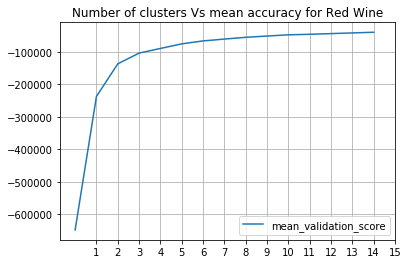

In [3]:
rdf = pd.DataFrame(data=red_grid_search_cv.grid_scores_)

x_ticks = []
for i in rdf.parameters.values:
    x_ticks.append(i['n_clusters'])

print(rdf.plot.line(title='Number of clusters Vs mean accuracy for Red Wine', 
                    grid=True, 
                   xticks=(x_ticks)))

The above graph shows that a good number for k for the red wine dataset is ~3. 

In [4]:
red_kmeans = KMeans(n_clusters=3)
red_kmeans.fit(red_wine_data)
print(red_kmeans.score(red_wine_data))
red_cluster_centres = pd.DataFrame(data=red_kmeans.cluster_centers_, columns=red_wine_feature_names)
red_cluster_centres

-395307.4447974317


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.887552,0.572365,0.275643,3.232365,0.088398,26.151452,108.506224,0.996935,3.289627,0.652033,10.008921
1,8.470516,0.519558,0.268391,2.360872,0.084596,9.014742,22.431204,0.996617,3.311314,0.647346,10.578952
2,8.285294,0.520450,0.272776,2.497794,0.091349,21.587316,54.950368,0.996858,3.320331,0.677022,10.373039


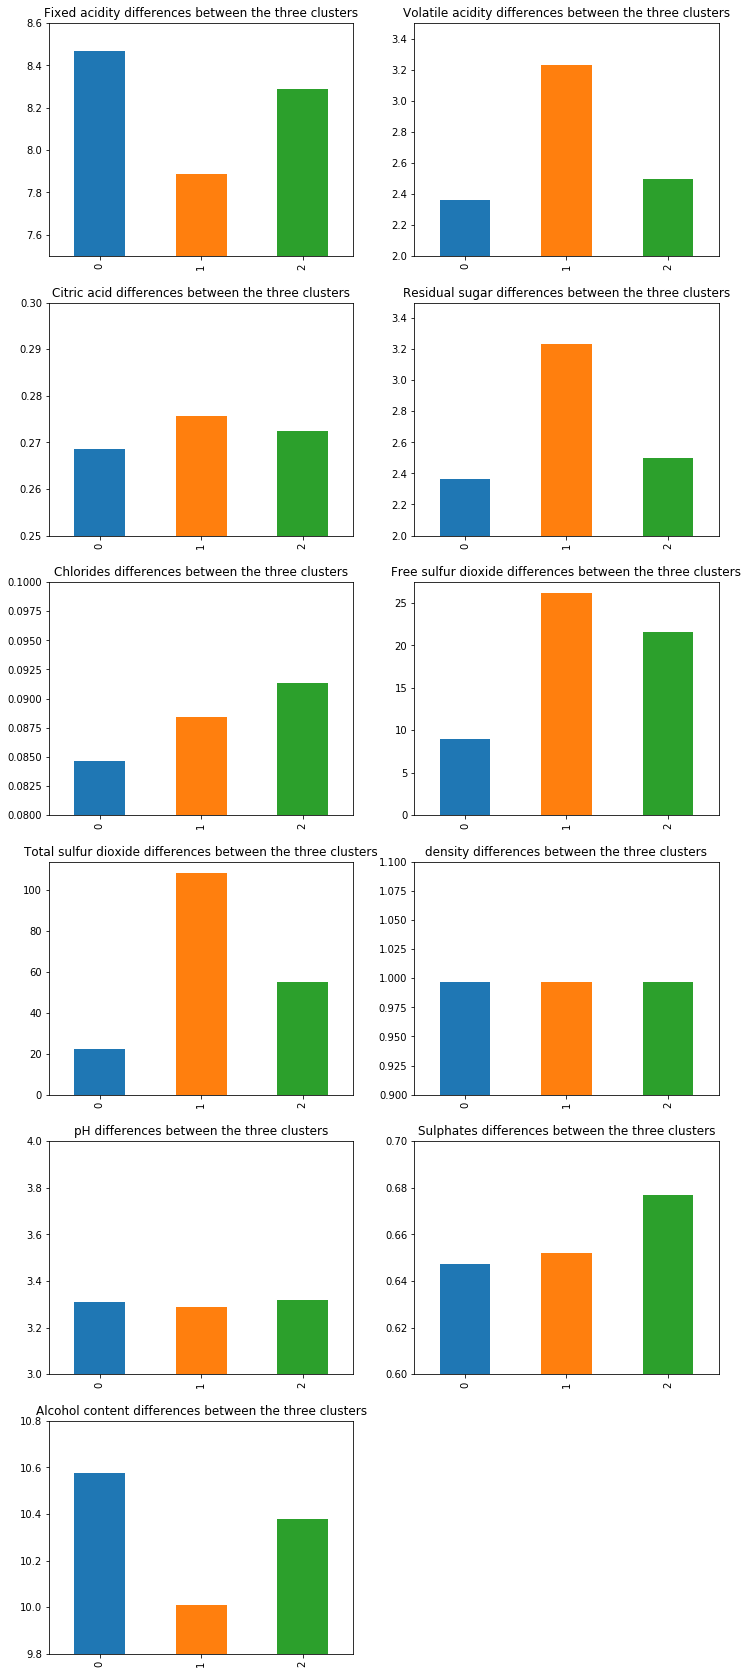

In [70]:
fig1, axarr1 = plt.subplots(6, 2, figsize=(12,30))

fixed_acidity_bar = red_cluster_centres['fixed acidity'].plot.bar(
    title='Fixed acidity differences between the three clusters', 
    ylim=(7.5,8.6),
    ax=axarr1[0][0])

volatile_acidity_bar = red_cluster_centres['residual sugar'].plot.bar(
    title='Volatile acidity differences between the three clusters', 
    ylim=(2,3.5),
    ax=axarr1[0][1])

citric_acid_bar = red_cluster_centres['citric acid'].plot.bar(
    title='Citric acid differences between the three clusters', 
    ylim=(0.25,0.3),
    ax=axarr1[1][0])

residual_sugar_bar = red_cluster_centres['residual sugar'].plot.bar(
    title='Residual sugar differences between the three clusters', 
    ylim=(2,3.5),
    ax=axarr1[1][1])

chlorides_bar = red_cluster_centres['chlorides'].plot.bar(
    title='Chlorides differences between the three clusters', 
    ylim=(0.08,0.1),
    ax=axarr1[2][0])

free_sulfur_dioxide_bar = red_cluster_centres['free sulfur dioxide'].plot.bar(
    title='Free sulfur dioxide differences between the three clusters', 
    ax=axarr1[2][1])

total_sulful_dioxide_bar = red_cluster_centres['total sulfur dioxide'].plot.bar(
    title='Total sulfur dioxide differences between the three clusters', 
    ax=axarr1[3][0])

density_bar = red_cluster_centres['density'].plot.bar(
    title='density differences between the three clusters', 
    ylim=(0.9,1.1),
    ax=axarr1[3][1])

pH_bar = red_cluster_centres['pH'].plot.bar(
    title='pH differences between the three clusters', 
    ylim=(3,4),
    ax=axarr1[4][0])

sulphates_bar = red_cluster_centres['sulphates'].plot.bar(
    title='Sulphates differences between the three clusters', 
    ylim=(0.6,0.7),
    ax=axarr1[4][1])

alcohol_bar = red_cluster_centres['alcohol'].plot.bar(
    title='Alcohol content differences between the three clusters', 
    ylim=(9.8,10.8), 
    ax=axarr1[5][0])

axarr1[5][1].axis('off')

fig1.savefig('red_kMeans_centroid_coordinate_bar_graphs.png')

## Please remember that if you run this, different centroids might end up describing each type of wine. In the analysis below, the numbered centroid may refer to a different type of wine than you see if you run this notebook. 

fixed acidity: 0 lower little  
volatile acidity: 0 higher lot  
citric acid: all about same  
residual sugar: 0 higher lot  
chlorides: all about same  
free sulfur dioxide: 1 lower lot  
total sulfur dioxide: 1-2-0 have 1:3:6 ratio  
density: all about same  
pH: all about same  
sulphates: 2 higher little  
alcohol: 0 lower lot  

This table shows in which features a cluster was significantly different from the other two, as indicated by **x**. A column of o's indicates they were all very close. A column of **x**'s means that all three values in that column were significantly different.

| Which is the odd one out | Fixed acidity  | Volatile acidity  | Citric acid  | Residual sugar  | Chlorides  | Free sulfur dioxide  | Total sulfur dioxide  | Density  | pH  | Sulphates  | Alcohol |
|---|---|---|---|---|---|---|---|---|---|---|---|
|**0**|**x**|**x**|o|**x**|o|-|**x**|o|o|-|**x**|
|**1**|-|-|o|-|o|**x**|**x**|o|o|-|-|
|**2**|-|-|o|-|o|-|**x**|o|o|**x**|-|

This table shows the same as the table immediately above, with a description of the relative difference of the feature of a cluster relative to that feature of the other two clusters.

| Which is the odd one out | Fixed acidity  | Volatile acidity  | Citric acid  | Residual sugar  | Chlorides  | Free sulfur dioxide  | Total sulfur dioxide  | Density  | pH  | Sulphates  | Alcohol |
|---|---|---|---|---|---|---|---|---|---|---|---|
|**0**|Little lower|Lot higher|o|Lot higher|o|-|High|o|o|-|Lot lower|
|**1**|-|-|o|-|o|Lot lower|Low|o|o|-|-|
|**2**|-|-|o|-|o|-|Medium|o|o|Little higher|-|



So there are three types of wine, differentiated here by;  
**Type 0**, having: lower *fixed acidity*, higher *volatile acidity*, more *residual sugar*, higher *total sulful dioxide*, and less *alcohol*  
**Type 1**, having: less *free sulfur dioxide*, and lower *total sulful dioxide*  
**Type 2**, having: a mid(ish) amount of *total sulfur dioxide*, and more *sulphates*

But which of the three types is the most popular? 

Type 0 size: 241
Type 1 size: 814
Type 2 size: 544


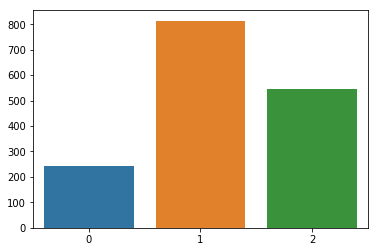

In [68]:
points_assigned_to_each_cluster = {i: np.where(red_kmeans.labels_ == i)[0] for i in range(red_kmeans.n_clusters)}
points_in_clusters = [points_assigned_to_each_cluster.get(0).size, points_assigned_to_each_cluster.get(1).size, points_assigned_to_each_cluster.get(2).size]
print('Type 0 size: ' + str(points_in_clusters[0]))
print('Type 1 size: ' + str(points_in_clusters[1]))
print('Type 2 size: ' + str(points_in_clusters[2]))
sns.barplot(x=[0,1,2], y=points_in_clusters)

For red wine, it is obvious that type 1 is the most popular type of wine, with type 2 as a solid second place, and type 0 as a distant third. So what is the most popular type of wine?

Low sulfur dioxide, free or in total. That's it. Low sulful dioxide wine is by supply (and therefore, I infer, by demand) the most popular type of wine, if you go about defining types of wine by their physicochemical components. 

If there was to be a second factor chosen, then the defining feature of type 2 - the second most popular type of wine - would be the presence of sulphates. My understanding is that sulphate and sulpher dioxide are the same thing for the purposes of wine, so I'd need to ask an expert what the difference between the two is. 

Also, given that sulphates are a preservative, and that higher sulphates (and sulpher dioxide) lead to higher quality ratings from experts, this popularity seems to go against what experts would say. 

Then again, this is a tenuous (at best) way of determinig popularity of wine - something that probably can't be determined from this dataset, and is more indicitive of a pooly chosen question/a bad dataset for trying to answer that question. 

Now for white wine. 

In [6]:
white_wine_data = white_wine.iloc[:,:-1]
white_wine_feature_names = white_wine_data.columns

In [18]:
param_grid = {'n_clusters':np.arange(1,16)}
white_grid_search_cv = GridSearchCV(KMeans(), param_grid)
white_grid_search_cv.fit(white_wine_data)
pp.pprint(white_grid_search_cv.grid_scores_)

[mean: -3549608.94948, std: 249656.26064, params: {'n_clusters': 1},
 mean: -1405203.22683, std: 74948.84099, params: {'n_clusters': 2},
 mean: -938491.21204, std: 14619.65256, params: {'n_clusters': 3},
 mean: -711270.47473, std: 24858.90774, params: {'n_clusters': 4},
 mean: -595850.10300, std: 28223.59883, params: {'n_clusters': 5},
 mean: -539136.84673, std: 24815.28123, params: {'n_clusters': 6},
 mean: -475229.42185, std: 33652.13553, params: {'n_clusters': 7},
 mean: -465354.78388, std: 18251.15401, params: {'n_clusters': 8},
 mean: -418185.54771, std: 22926.21224, params: {'n_clusters': 9},
 mean: -389919.54659, std: 9548.96787, params: {'n_clusters': 10},
 mean: -358613.40466, std: 17635.92737, params: {'n_clusters': 11},
 mean: -341937.38968, std: 19141.58997, params: {'n_clusters': 12},
 mean: -321598.63362, std: 11297.21841, params: {'n_clusters': 13},
 mean: -307549.67988, std: 15274.96082, params: {'n_clusters': 14},
 mean: -289354.22891, std: 16570.92216, params: {'n_clu

/home/chhk/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


/home/chhk/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


AxesSubplot(0.125,0.125;0.775x0.755)


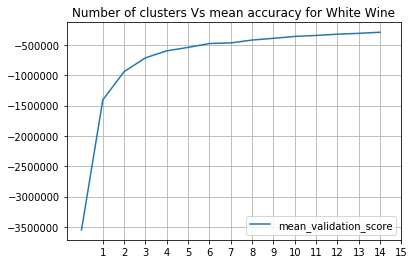

In [19]:
wdf = pd.DataFrame(data=white_grid_search_cv.grid_scores_)

x_ticks = []
for i in wdf.parameters.values:
    x_ticks.append(i['n_clusters'])

print(wdf.plot.line(title='Number of clusters Vs mean accuracy for White Wine', 
                    grid=True, 
                   xticks=(x_ticks)))

The above graph shows a good number for k for the white wine data is 4. 

In [20]:
white_kmeans = KMeans(n_clusters=4)
white_kmeans.fit(white_wine_data)
print(white_kmeans.score(white_wine_data))
white_cluster_centres = pd.DataFrame(data=white_kmeans.cluster_centers_, columns=white_wine_feature_names)
white_cluster_centres

-2081113.5598529202


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.779515,0.272449,0.324816,5.375219,0.043277,30.164231,121.444477,0.993203,3.195809,0.484939,10.834697
1,6.981746,0.296627,0.356190,9.710516,0.052275,52.831349,206.849206,0.996553,3.176931,0.518029,9.611750
2,6.810473,0.275081,0.316868,3.613444,0.040121,20.694864,83.406848,0.991937,3.175458,0.470967,11.224958
3,6.908206,0.277650,0.345744,7.773887,0.049225,42.307024,160.429764,0.995124,3.194096,0.493908,10.116722


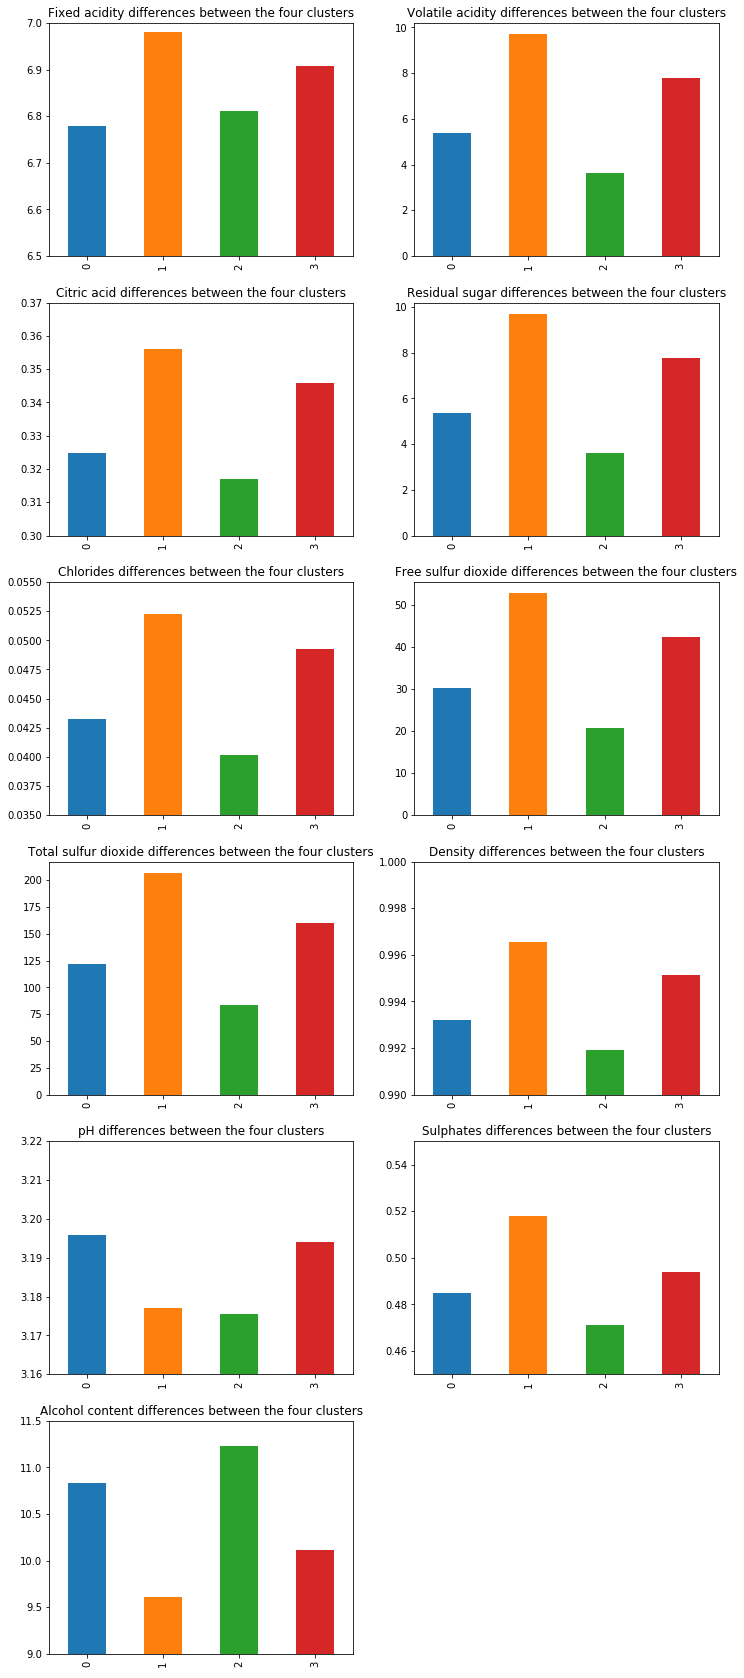

In [33]:
fig2, axarr2 = plt.subplots(6, 2, figsize=(12,30))

fixed_acidity_bar = white_cluster_centres['fixed acidity'].plot.bar(
    title='Fixed acidity differences between the four clusters', 
    ylim=(6.5,7),
    ax=axarr2[0][0])

volatile_acidity_bar = white_cluster_centres['residual sugar'].plot.bar(
    title='Volatile acidity differences between the four clusters', 
    ax=axarr2[0][1])

citric_acid_bar = white_cluster_centres['citric acid'].plot.bar(
    title='Citric acid differences between the four clusters', 
    ylim=(0.3,0.37),
    ax=axarr2[1][0])

residual_sugar_bar = white_cluster_centres['residual sugar'].plot.bar(
    title='Residual sugar differences between the four clusters', 
    ax=axarr2[1][1])

chlorides_bar = white_cluster_centres['chlorides'].plot.bar(
    title='Chlorides differences between the four clusters', 
    ylim=(0.035,0.055),
    ax=axarr2[2][0])

free_sulfur_dioxide_bar = white_cluster_centres['free sulfur dioxide'].plot.bar(
    title='Free sulfur dioxide differences between the four clusters', 
    ax=axarr2[2][1])

total_sulful_dioxide_bar = white_cluster_centres['total sulfur dioxide'].plot.bar(
    title='Total sulfur dioxide differences between the four clusters', 
    ax=axarr2[3][0])

density_bar = white_cluster_centres['density'].plot.bar(
    title='Density differences between the four clusters', 
    ylim=(0.99,1),
    ax=axarr2[3][1])

pH_bar = white_cluster_centres['pH'].plot.bar(
    title='pH differences between the four clusters', 
    ylim=(3.16,3.22),
    ax=axarr2[4][0])

sulphates_bar = white_cluster_centres['sulphates'].plot.bar(
    title='Sulphates differences between the four clusters', 
    ylim=(0.45,0.55),
    ax=axarr2[4][1])

alcohol_bar = white_cluster_centres['alcohol'].plot.bar(
    title='Alcohol content differences between the four clusters', 
    ylim=(9,11.5), 
    ax=axarr2[5][0])

axarr2[5][1].axis('off')

fig2.savefig('white_kMeans_centroid_coordinate_bar_graphs.png')

This table shows significant feature differences between clusters, as indicated by **x**. A column of o's indicates they were all very close. A column of **x**'s means that all three values in that column were significantly different.

| Which is the odd one out | Fixed acidity | Volatile acidity | Citric acid | Residual sugar | Chlorides | Free sulfur dioxide | Total sulfur dioxide | Density | pH | Sulphates | Alcohol |
|---|---|---|---|---|---|---|---|---|---|---|---|
|**0**| - | - | - | - | - | - | - | - | **X** | - | **x** |
|**1**| **x** | **x** | **x** | **x** | **x** | **x** | **x** | **x** | - | **x** | - |
|**2**| - | - | - | - | - | - | - | - | - | - | **x** |
|**3**| **x** | **x** | **x** | **x** | **x** | **x** | **x** | **x** | **X** | **x** | - |

This table shows the same as the table immediately above, with a description of the relative difference of the feature of a cluster relative to that feature of the other two clusters.

| Which is the odd one out | Fixed acidity | Volatile acidity | Citric acid | Residual sugar | Chlorides | Free sulfur dioxide | Total sulfur dioxide | Density | pH | Sulphates | Alcohol |
|---|---|---|---|---|---|---|---|---|---|---|---|
|**0**| Low | Low | Low | Low | Low | Low | Low | Low | High | Low | Medium-high |
|**1**| High | High | High | High | High | High | High | High | Low | High | Low |
|**2**| Low | Low | Low | Low | Low | Low | Low | Low | Low | Low | High |
|**3**| Medium | Medium | Medium | Medium | Medium | Medium | Medium | High | High | Medium | Medium |

So there are four types of white wine, differentiated here by;  
**Type 0**, having: lower *everything*, except for *pH* and *alcohol*, which are higher  
**Type 1**, having: higher *everything*, except for *pH* and *alcohol*, which are lower  
**Type 2**, having: lower *everything*, except for *alcohol*, which is higher  
**Type 3**, having: higher *everything*, except for *alcohol* which is lower  

I don't know enough about wine to interpret what that means, apart from the acidic taste and the taste of alcohol being the main differentiators. 

But which of the three types is the most popular? 

Type 0 size: 1710
Type 1 size: 756
Type 2 size: 992
Type 3 size: 1440


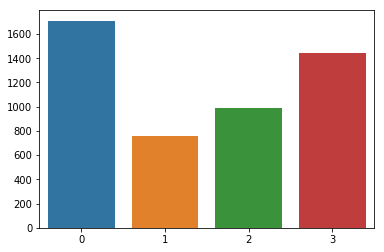

In [34]:
points_assigned_to_each_cluster_white = {i: np.where(white_kmeans.labels_ == i)[0] for i in range(white_kmeans.n_clusters)}
points_in_clusters_white = [points_assigned_to_each_cluster_white.get(0).size, points_assigned_to_each_cluster_white.get(1).size, points_assigned_to_each_cluster_white.get(2).size, points_assigned_to_each_cluster_white.get(3).size]
print('Type 0 size: ' + str(points_in_clusters_white[0]))
print('Type 1 size: ' + str(points_in_clusters_white[1]))
print('Type 2 size: ' + str(points_in_clusters_white[2]))
print('Type 3 size: ' + str(points_in_clusters_white[3]))
sns.barplot(x=[0,1,2,3], y=points_in_clusters_white)

For white wine, it is type 0 that is most popular, with type 3 as a solid second place, type 3 as third, and type 1 as fourth. So what is the most popular type of wine?

The most and least popular types of wine, which have a greater than 2:1 ratio, are (relatively) opposite in composition. The most popular has lower levels of all measured physicochemical properties, with the exceptop of pH and alcohol, which it has higher levels of. 

Of the two middle-popularity types, their differences are the opposite of the the most and least popular. The second most popular type (3) of white wine has relatively higher levels of everything except alcohol. The third has relatively lower levels of everything except alcohol, which it has higher levels of - the highest of any of the types of wine. 

This makes it difficult to discern what makes a white wine more popular (in terms of supply and the demand that implies), since the top two most popular wines have mostly opposite physicochemical properties. 

The lack of clarity could stem from poor analysis on my part, or it could stem from the question not being reasonably answerable from the data provided, which does not include pricing, advertising, where the wine is sold (or even if it's consumed nationally or internationally), or what proportion of all Portugese wines these represent. Either way this hasn't turned out to be a useful analysis to undertake. 